## Flow cytometry vs Number of cells per cluster

In [1]:
import FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate, PolyGate
import numpy as np
from scipy.stats import norm
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/ePN003_FACS/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/ePN003_FACS


In [3]:
ls

Cells_per_clust_vs_FSC_A.png  Day2_Tube_007_011.fcs*
Day2_Tube_005_009.fcs*        Day2_Tube_008_012.fcs*
Day2_Tube_006_010.fcs*


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


33699.984375
44363.05078125
53629.0703125
62867.38671875


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

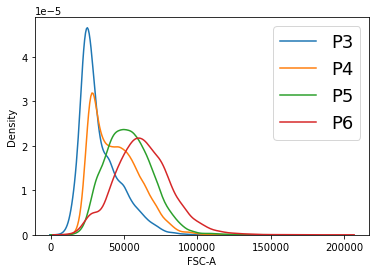

In [4]:
files=['Day2_Tube_005_009.fcs','Day2_Tube_006_010.fcs','Day2_Tube_007_011.fcs','Day2_Tube_008_012.fcs']
arr=[]
for f in files:
    rep3_0=FCMeasurement(ID='3_0',datafile=f)
    arr.append(rep3_0['FSC-A'])
    sns.distplot(rep3_0['FSC-A'],hist=None)
    print(rep3_0['FSC-A'].mean())

plt.legend(['P3','P4','P5','P6'],fontsize=18)

In [5]:
np.array(arr).reshape(1,40000)

array([[36759.84 , 49992.957, 20016.959, ..., 57959.52 , 52473.117,
        41212.8  ]], dtype=float32)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

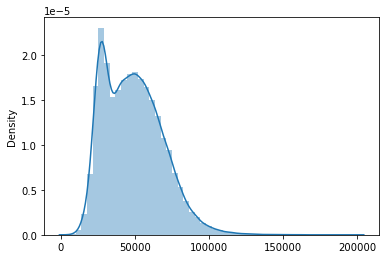

In [6]:
sns.distplot(np.array(arr).reshape(1,40000))

In [7]:
raw_fsc=np.array([33700,44363,53629,62867])
fsc=np.power(raw_fsc,2)
fsc=fsc.reshape(-1,1)
counts=np.array([2.72,3.33,3.6,4.12])
counts=counts.reshape(-1,1)

In [8]:
lreg=LinearRegression().fit(fsc,counts)
m1=lreg.coef_
c1=lreg.intercept_
Ypred=lreg.predict(fsc)
r2=r2_score(counts,Ypred)

In [9]:
r2

0.9749361896760712

In [10]:
"y= "+str(m1[0][0])+".x +"+str(np.round(c1[0],3))

'y= 4.753922384137711e-10.x +2.262'

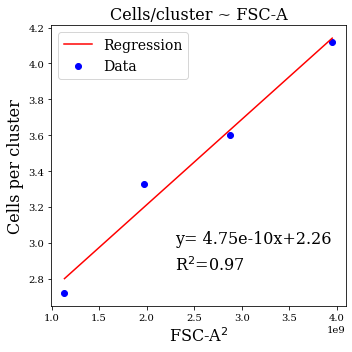

In [11]:
plt.rc('font',family='serif')
plt.figure(figsize=(5,5))
sns.violinplot(fsc,counts,color='b')
plt.plot(fsc,m1*fsc+c1,'r-')
plt.xlabel(r'FSC-A$^2$',fontsize=16)
plt.ylabel('Cells per cluster',fontsize=16)
plt.legend(['Regression','Data'],fontsize=14)
slope=np.round(m1[0][0]/1e-10,2)
# plt.text(1.25e10,5.0,'Cells/cluster ='+str(slope)+"e-10"+r'.FSC-A$^3$',fontsize=16)
# plt.text(2.0e10,4.0,r'R$^2$='+str(np.round(r2,3)),fontsize=16)
plt.title('Cells/cluster ~ FSC-A',fontsize=16)
equation="y= 4.75e-10x+2.26"
plt.text(2.3e9,3,equation,fontsize=16)
r2_txt=r'R$^2$='+str(np.round(r2,2))
plt.text(2.3e9,2.85,r2_txt,fontsize=16)
plt.tight_layout()


# save_file='/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/FlowvsCounts_FACS.jpg'
# plt.savefig(save_file,dpi=600)


## Multisizer vs Number of cells per cluster

In [25]:
import FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate, PolyGate
import numpy as np
from scipy.stats import norm
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [27]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/ePN003_Multisizer/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/ePN003_Multisizer


In [28]:
#Convert the data from multi-sizer equipment into cluster volumes 
def bins_to_data(df):
    df=df.loc[df['Diff.']>0,:]
    sr=df['Bin Diameter'].repeat(df['Diff.'])
    return sr


In [29]:
f=['P3_2.#m3.csv','P4_2.#m3.csv','P5_2.#m3.csv','P6_2.#m3.csv']
for file in f:
    mult=bins_to_data(pd.read_csv(file,skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17]))
    print(mult.mean())

5.649517524530029
6.361644356769609
6.979369974359097
7.709148341815489


In [40]:
raw_mult=np.array([5.65,6.36,6.98,7.71])
mult=np.power(raw_mult,2.65)
mult=mult.reshape(-1,1)
counts=np.array([2.72,3.33,3.6,4.12])
counts=counts.reshape(-1,1)

In [41]:
lreg=LinearRegression().fit(mult,counts)
m1=lreg.coef_
c1=lreg.intercept_
Ypred=lreg.predict(mult)
r2=r2_score(counts,Ypred)

In [43]:
r2

0.9736066602067024

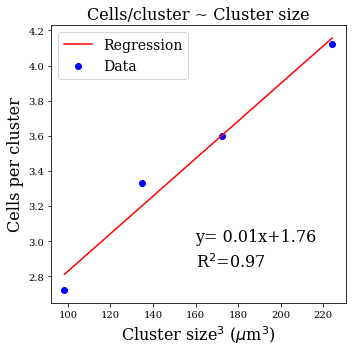

In [44]:
plt.rc('font',family='serif')
plt.figure(figsize=(5,5))
plt.scatter(mult,counts,color='b')
plt.plot(mult,m1*mult+c1,'r-')
plt.xlabel(r'Cluster size$^3$ ($\mu$m$^3$)',fontsize=16)
plt.ylabel('Cells per cluster',fontsize=16)
plt.legend(['Regression','Data'],fontsize=14)

plt.title('Cells/cluster ~ Cluster size',fontsize=16)
equation="y= 0.01x+1.76"
plt.text(160,3,equation,fontsize=16)
r2_txt=r'R$^2$='+str(np.round(r2,2))
plt.text(160,2.85,r2_txt,fontsize=16)
plt.tight_layout()


save_file='/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/MultisizervsCounts_FACS.jpg'
plt.savefig(save_file,dpi=600)

